In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from skimage import io
import TOF_routines
from TOF_routines import l2tof, tof2l
from TOF_routines import find_nearest
from astropy.io import fits
from matplotlib_scalebar.scalebar import ScaleBar

In [2]:
# This are the images without BB correction
nBins=165 
spectrum_img=np.zeros((476,476,nBins))
print(np.shape(spectrum_img))
for i in range (0, nBins):
    filename = 'D:\Kaestner\ISIS_IAEAData\RB1730044\PSI_Cylinder\Sample\RB1730044\Tomo_test\CT_recon_binSum_165bin_249\\bin'+str(i).zfill(4)+'\slice_0405.tif'
    spectrum_img[:,:,i]=io.imread(filename)
#     print(filename)

(476, 476, 165)


In [3]:
# I now load the images with BB correction
nBins=165 
spectrum_img_BB=np.zeros((476,476,nBins))
print(np.shape(spectrum_img_BB))
for i in range (0, nBins):
    filename = 'D:\Kaestner\ISIS_IAEAData\RB1730044\PSI_Cylinder\Sample\RB1730044\Tomo_test\CT_recon_binSum_165bin_249_BBcorrected_const\\bin'+str(i).zfill(4)+'\slice_0405.tif'
    spectrum_img_BB[:,:,i]=io.imread(filename)
#     print(filename)

(476, 476, 165)


In [4]:
nBins=165 
spectrum_IMAT=np.zeros((512,512,nBins))
print(np.shape(spectrum_IMAT))
for i in range (0, nBins):
#     filename = 'D:\Kaestner\ISIS_IAEAData\RB1730044\PSI_Cylinder\Sample\RB1730044\Tomo_test\CT_recon_binSum_165bin_249_BBcorrected_const\\bin'+str(i).zfill(4)+'\slice_0405.tif'
    filename = 'D:/Kaestner/ISIS_IAEAData/RB1730015/Tomo_test_RB1730044/OpenBeam_aft2_Corrected_Binned/IMAT_tomo_binned_'+str(i).zfill(5)+'.fits'
    with fits.open(filename) as f:
        spectrum_IMAT[:,:,i]=f[0].data

(512, 512, 165)


In [5]:
Ti = np.zeros(nBins)
Fe = np.zeros(nBins)
Pb = np.zeros(nBins)
Ni = np.zeros(nBins)
Cu = np.zeros(nBins)
Al = np.zeros(nBins)
Ti_BB = np.zeros(nBins)
Fe_BB = np.zeros(nBins)
Pb_BB = np.zeros(nBins)
Ni_BB = np.zeros(nBins)
Cu_BB = np.zeros(nBins)
Al_BB = np.zeros(nBins)

for i in range(0,nBins):
    Ti[i] = np.median(spectrum_img[150:200,80:130,i])
    Pb[i] = np.median(spectrum_img[50:100,200:250,i])
    Fe[i] = np.median(spectrum_img[300:350, 80:130,i])
    Cu[i] = np.median(spectrum_img[130:180,350:400,i])
    Ni[i] = np.median(spectrum_img[380:430,230:280,i])
    Al[i] = np.median(spectrum_img[280:330,330:380,i])
    Ti_BB[i] = np.median(spectrum_img_BB[150:200,80:130,i])
    Pb_BB[i] = np.median(spectrum_img_BB[50:100,200:250,i])
    Fe_BB[i] = np.median(spectrum_img_BB[300:350, 80:130,i])
    Cu_BB[i] = np.median(spectrum_img_BB[130:180,350:400,i])
    Ni_BB[i] = np.median(spectrum_img_BB[380:430,230:280,i])
    Al_BB[i] = np.median(spectrum_img_BB[280:330,330:380,i])
    
    

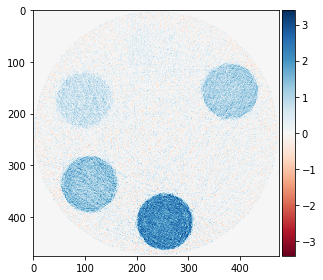

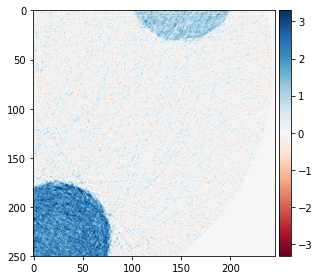

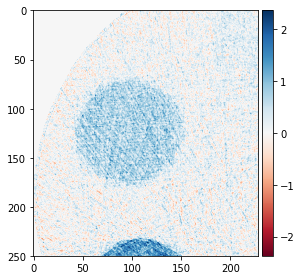

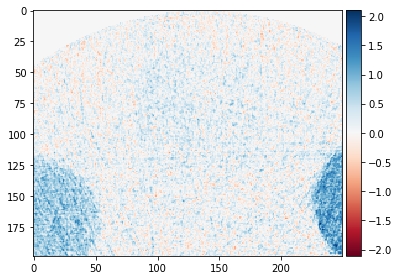

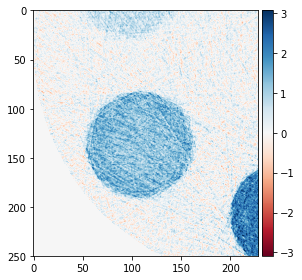

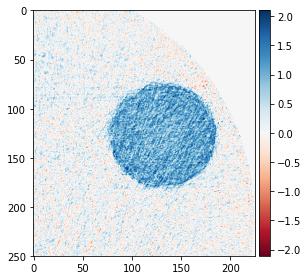

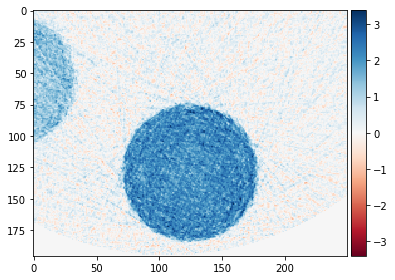

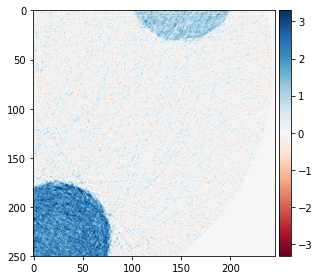

In [6]:
plt.figure()
io.imshow(spectrum_img[:,:,100])

plt.figure()
io.imshow(spectrum_img[280-100:330+100,330-100:380+100,100])

plt.figure()
io.imshow(spectrum_img[150-100:200+100,80-79:130+100,100])

plt.figure()
io.imshow(spectrum_img[50-49:100+100,200-100:250+100,100])

plt.figure()
io.imshow(spectrum_img[300-100:350+100, 80-79:130+100,100])

plt.figure()
io.imshow(spectrum_img[130-100:180+100,350-100:400+100,100])

plt.figure()
io.imshow(spectrum_img[380-100:430+100,230-100:280+100,100])

plt.figure()
io.imshow(spectrum_img[280-100:330+100,330-100:380+100,100])

In [7]:
myTOF = np.genfromtxt('D:\Kaestner\ISIS_IAEAData\RB1730044\PSI_Cylinder\Sample\RB1730044\Tomo_test\Sample\\angle0\IMAT00004675_Tomo_test_000_Spectra.txt', usecols=0)
t0 =  0.0
L = 56
h=6.62607004e-34 #Planck constant [m^2 kg / s]
m=1.674927471e-27 #Neutron mass [kg]
lambda0=0
myLambda =tof2l(myTOF, lambda0,t0,L)
lambda_bin = myLambda[1::18]

In [8]:
filename ="Cu.txt"
data_Cu = np.genfromtxt(filename)
print(np.shape(data_Cu))

data_Fe = np.genfromtxt('Fe.txt')
data_Pb=np.genfromtxt('Pb.txt')
data_Ti=np.genfromtxt('Ti.txt')
data_Ni=np.genfromtxt('Ni.txt')
data_Al = np.genfromtxt('Al.txt')

(300, 2)


Text(0.04, 0.5, 'attenuation coefficient [cm$^{-1}$]')

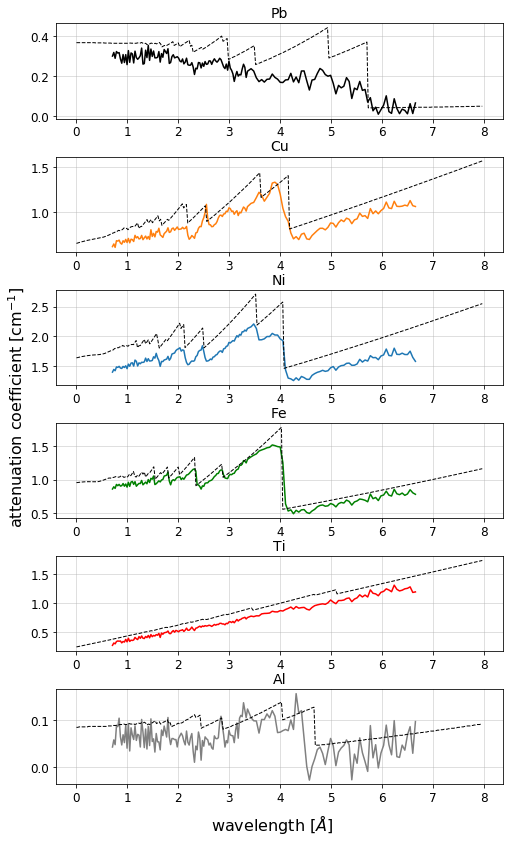

In [9]:
fig, ax = plt.subplots(nrows=3, ncols=3, sharex=True, sharey=True, figsize=(8, 14))

plt.subplot(611)
plt.plot(lambda_bin, Pb, 'k')
plt.plot(data_Pb[:,0],data_Pb[:,1],'--k',linewidth=1)
plt.title('Pb', fontsize=14)
plt.grid(alpha=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.subplot(612)
plt.plot(lambda_bin, Cu, 'C1')
plt.plot(data_Cu[:,0],data_Cu[:,1],'--k',linewidth=1)
plt.title('Cu', fontsize=14)
plt.grid(alpha=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.subplot(613)
plt.plot(lambda_bin, Ni)
plt.plot(data_Ni[:,0],data_Ni[:,1],'--k',linewidth=1)
plt.title('Ni', fontsize=14) 
plt.grid(alpha=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)


plt.subplot(614)
plt.plot(lambda_bin, Fe,'g')
plt.plot(data_Fe[:,0],data_Fe[:,1],'--k',linewidth=1)
plt.title('Fe', fontsize=14)
plt.grid(alpha=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.subplot(615)
plt.plot(lambda_bin, Ti,'r')
plt.plot(data_Ti[:,0],data_Ti[:,1],'--k',linewidth=1)
plt.title('Ti', fontsize=14)
plt.grid(alpha=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.subplot(616)
plt.plot(lambda_bin, Al, 'gray')
plt.plot(data_Al[:,0],data_Al[:,1],'--k',linewidth=1)
plt.title('Al', fontsize=14)
plt.grid(alpha=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.subplots_adjust(hspace=0.4)
fig.text(0.5, 0.08, 'wavelength [$\AA$]', ha='center',fontsize=16)
fig.text(0.04, 0.5, 'attenuation coefficient [cm$^{-1}$]', va='center', rotation='vertical', fontsize=16)

# plt.savefig('spectra_plots.tiff')
# plt.savefig('spectra_plots_NOBB.png', dpi=500)
# plt.savefig('spectra_plots.pdf')

Text(0.04, 0.5, 'attenuation coefficient [cm$^{-1}$]')

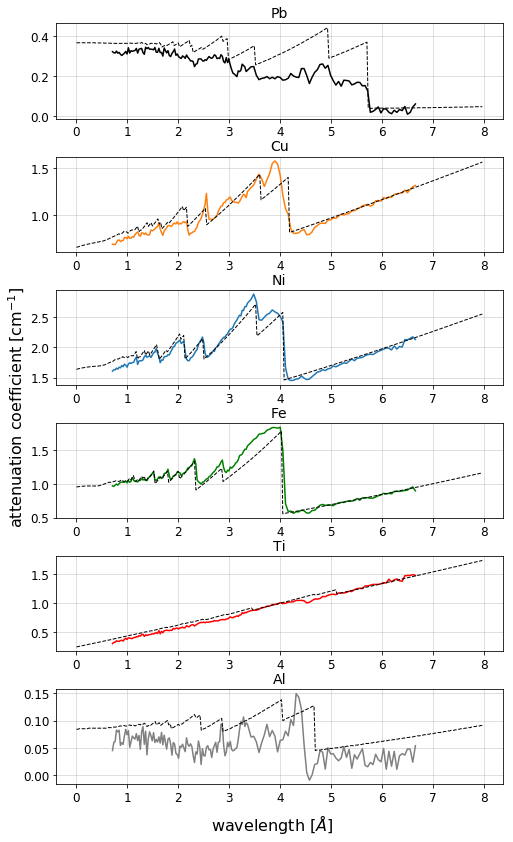

In [10]:
fig, ax = plt.subplots(nrows=3, ncols=3, sharex=True, sharey=True, figsize=(8, 14))

plt.subplot(611)
plt.plot(lambda_bin, Pb_BB, 'k')
plt.plot(data_Pb[:,0],data_Pb[:,1],'--k',linewidth=1)
plt.title('Pb', fontsize=14)
plt.grid(alpha=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.subplot(612)
plt.plot(lambda_bin, Cu_BB, 'C1')
plt.plot(data_Cu[:,0],data_Cu[:,1],'--k',linewidth=1)
plt.title('Cu', fontsize=14)
plt.grid(alpha=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.subplot(613)
plt.plot(lambda_bin, Ni_BB)
plt.plot(data_Ni[:,0],data_Ni[:,1],'--k',linewidth=1)
plt.title('Ni', fontsize=14) 
plt.grid(alpha=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)


plt.subplot(614)
plt.plot(lambda_bin, Fe_BB,'g')
plt.plot(data_Fe[:,0],data_Fe[:,1],'--k',linewidth=1)
plt.title('Fe', fontsize=14)
plt.grid(alpha=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.subplot(615)
plt.plot(lambda_bin, Ti_BB,'r')
plt.plot(data_Ti[:,0],data_Ti[:,1],'--k',linewidth=1)
plt.title('Ti', fontsize=14)
plt.grid(alpha=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.subplot(616)
plt.plot(lambda_bin, Al_BB, 'gray')
plt.plot(data_Al[:,0],data_Al[:,1],'--k',linewidth=1)
plt.title('Al', fontsize=14)
plt.grid(alpha=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.subplots_adjust(hspace=0.4)
fig.text(0.5, 0.08, 'wavelength [$\AA$]', ha='center',fontsize=16)
fig.text(0.04, 0.5, 'attenuation coefficient [cm$^{-1}$]', va='center', rotation='vertical', fontsize=16)

In [11]:
spectrum = np.zeros(nBins)
for i in range(0,nBins):
    spectrum[i] = np.median(spectrum_IMAT[:,:,i])

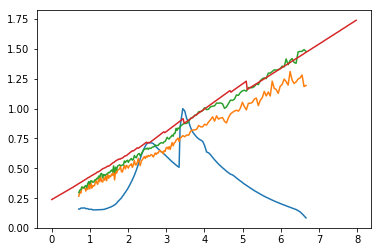

In [12]:
plt.figure()
plt.plot(lambda_bin, spectrum/np.max(spectrum))
plt.plot(lambda_bin, Ti)
plt.plot(lambda_bin, Ti_BB)
plt.plot(data_Ti[:,0], data_Ti[:,1])

(165,)


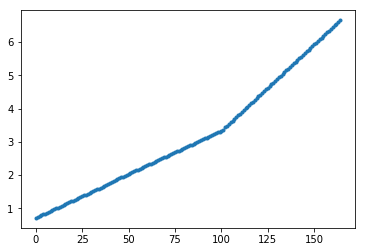

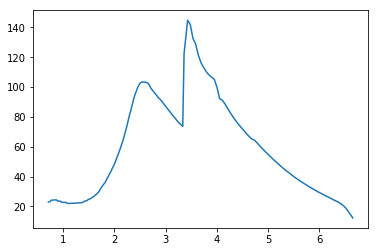

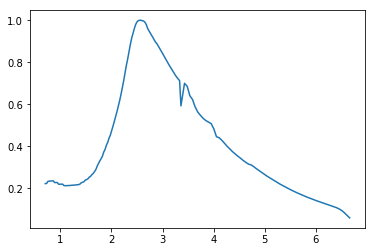

In [16]:
plt.figure()
plt.plot(lambda_bin,'.')


plt.figure()
plt.plot(lambda_bin, spectrum)

# spectrum_proc = []
# spectrum_proc.append(spectrum_norm[1:100])
# spectrum_proc.append(spectrum_norm[101:]/2)

# spectrum_proc = np.concatenate(spectrum_norm[1:100], spectrum_norm[101:]/2.0, axis=1)
spectrum_proc = np.zeros(nBins)

for i in range(0,nBins):
    
    if i<101:
        spectrum_proc[i] = spectrum[i]
    else:
        spectrum_proc[i] = spectrum[i]/2.0
#     print(spectrum_proc[i])
# spectrum_proc = [spectrum_norm[1:100], spectrum_norm[101:]/2]

print(np.shape(spectrum_proc))

plt.figure()
plt.plot(lambda_bin, spectrum_proc/np.max(spectrum_proc))

In [19]:
# provo a vedere se ho capito i coefficienti di attenuazione. Altrimenti mi ritiro.
# Provo con il Ti che e' quello pu' vicino all'ideale
spectrum_norm = spectrum_proc/np.max(spectrum_proc)
data_Ti[:,1]
pos1 = find_nearest(data_Ti[:,0], 0.7)
pos2 = find_nearest(data_Ti[:,0], 6.7)
print(pos1,pos2)

att_Ti = 0
att_Ni = 0
att_Fe = 0
att_Pb = 0
att_Cu = 0
att_Al = 0

for i in range(0, nBins):
    pos = find_nearest(data_Ti[:,0], lambda_bin[i])
    att_Ti += data_Ti[pos,1]*spectrum_norm[i]
    att_Ni += data_Ni[pos,1]*spectrum_norm[i]
    att_Fe += data_Fe[pos,1]*spectrum_norm[i]
    att_Pb += data_Pb[pos,1]*spectrum_norm[i]
    att_Cu += data_Cu[pos,1]*spectrum_norm[i]
    att_Al += data_Al[pos,1]*spectrum_norm[i]

print(att_Ti)
print('Ti: ', att_Ti/np.sum(spectrum_norm))
print('Ni: ', att_Ni/np.sum(spectrum_norm))
print('Fe: ', att_Fe/np.sum(spectrum_norm))
print('Cu: ', att_Cu/np.sum(spectrum_norm))
print('Pb: ', att_Pb/np.sum(spectrum_norm))
print('Al: ', att_Al/np.sum(spectrum_norm))
# print(np.sum(data_Ti[pos1:pos2,1])/(pos2-pos1))
# print(np.sum(Ti)/len(Ti))
# print(np.sum(Ti_BB)/len(Ti_BB))

# print(np.sum(data_Ti[pos1:pos2,1]*spectrum_norm)/(pos2-pos1))



26 251
59.391980453668275
Ti:  0.7960139592020755
Ni:  2.040279964455578
Fe:  1.0908102154222912
Cu:  1.0439265256412424
Pb:  0.3357391965129833
Al:  0.09361047451078731


In [ ]:
print(np.sum(Ti_BB)/len(Ti_BB))
print(np.sum(Ti)/len(Ti))
print(np.sum(data_Ti[pos1:pos2,1])/(pos2-pos1))

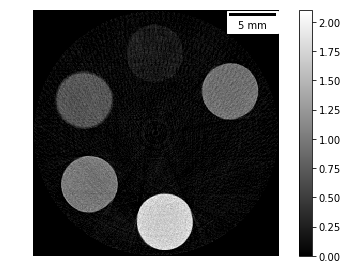

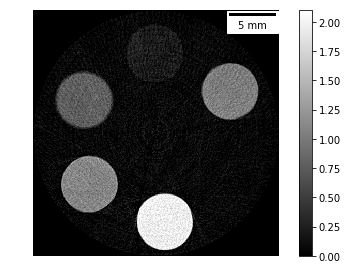

In [83]:
img_WB=io.imread('D:\Kaestner\ISIS_IAEAData\RB1730044\PSI_Cylinder\Sample\RB1730044\Tomo_test\CT_recon_WhiteBeam\slice_0405.tif')
img_WB_BB=io.imread('D:\Kaestner\ISIS_IAEAData\RB1730044\PSI_Cylinder\Sample\RB1730044\Tomo_test\CT_recon_WhiteBeam_BBcorrected\slice_0405.tif')

plt.figure()
cs=plt.imshow(img_WB, cmap='gray',vmin=0.0, vmax=2.1)
plt.axis('off')
plt.colorbar(cs)


scalebar = ScaleBar(0.000055) # 1 pixel = 0.2 meter
plt.gca().add_artist(scalebar)
plt.tight_layout()
plt.savefig('WhiteBeam.png', dpi=600) # This is also to be updated as i
# scalebar = AnchoredSizeBar(plt.get_axis, 0.055,'mm','upper right')

# plt.add_artist(scalebar)

plt.figure()
cs=plt.imshow(img_WB_BB, cmap='gray',vmin=0.0, vmax=2.1)
plt.axis('off')
plt.colorbar(cs)
scalebar2 = ScaleBar(0.000055) 
plt.gca().add_artist(scalebar2)
plt.tight_layout()
plt.savefig('WhiteBeam_BB.png', dpi=600) # This is also to be updated as i
plt.savefig('WhiteBeam_BB.pdf')

In [35]:
nBins=2971 
spectrum_IMAT_tot=np.zeros((nBins))
print(np.shape(spectrum_IMAT_tot))
for i in range (0, nBins):
#     filename = 'D:\Kaestner\ISIS_IAEAData\RB1730044\PSI_Cylinder\Sample\RB1730044\Tomo_test\CT_recon_binSum_165bin_249_BBcorrected_const\\bin'+str(i).zfill(4)+'\slice_0405.tif'
    filename = 'D:/Kaestner/ISIS_IAEAData/RB1730015/Tomo_test_RB1730044/OpenBeam_aft2_Corrected/IMAT_ob__'+str(i).zfill(5)+'.fits'
    with fits.open(filename) as f:
        spectrum_IMAT_tot[i]=np.average(f[0].data)

(2971,)


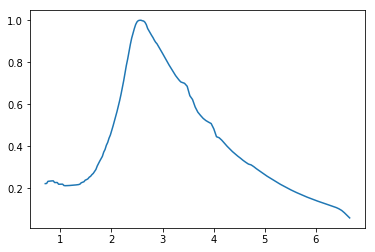

In [41]:

spectrum_proc[101] = (spectrum_proc[100]+spectrum_proc[102])/2


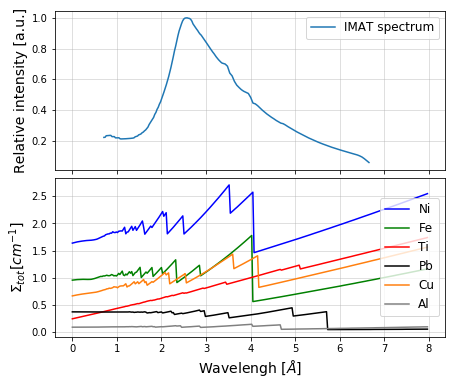

In [84]:
plt.subplots(figsize=(7,6))
ax1 = plt.subplot(211)
plt.plot(lambda_bin, spectrum_proc/np.max(spectrum_proc), label='IMAT spectrum')
plt.setp(ax1.get_xticklabels(), visible=False)
plt.ylabel('Relative intensity [a.u.]', fontsize=14)
plt.grid(alpha=0.5)
plt.legend(fontsize=12)

ax2 = plt.subplot(212, sharex=ax1)
plt.plot(data_Ni[:,0], data_Ni[:,1], c='b', label='Ni')
plt.plot(data_Fe[:,0], data_Fe[:,1], c='g', label='Fe')
plt.plot(data_Ti[:,0], data_Ti[:,1], c='r', label='Ti')
plt.plot(data_Pb[:,0], data_Pb[:,1], c='k', label='Pb')
plt.plot(data_Cu[:,0], data_Cu[:,1], c='C1',label='Cu')
plt.plot(data_Al[:,0], data_Al[:,1], c='gray', label='Al')
plt.grid(alpha=0.5)
plt.legend(loc='right', fontsize=12)

plt.xlabel('Wavelengh [$\AA$]', fontsize=14)
plt.ylabel('$\Sigma_{tot}$[$cm^{-1}$]', fontsize=14)
plt.subplots_adjust(hspace=0.05)

plt.savefig('IMAT_spectrum_And_Thoretical.png', dpi=600)

## 4D data analysis on the reconstructions obtained with corrected background 

In [15]:
nBins=165 
nSlices = 1
spectrum_img_BB_4D=np.zeros((476,476,nSlices,nBins))
# spectrum_img_BB_4D =[]
print(np.shape(spectrum_img_BB_4D))
for i in range (0, nBins):
    print('nBin: ....' , i)
    for j in range(300, 301):
        filename = 'D:\Kaestner\ISIS_IAEAData\RB1730044\PSI_Cylinder\Sample\RB1730044\Tomo_test\CT_recon_binSum_165bin_249_BBcorrected\\bin'+str(i).zfill(4)+'\slice_'+str(j).zfill(4)+'.tif'
#         print(filename)
        spectrum_img_BB_4D[:,:,j-300,i]= io.imread(filename)
#         spectrum_img_BB_4D.append(io.imread(filename))
#     print(filename)

MemoryError: 

In [8]:
print(np.shape(spectrum_img_BB_4D))

MemoryError: 